In [101]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import preproc as prp

## Use weights 

In [3]:
%%time 

from keras.models import model_from_json

json_decoder = ''
json_encoder = ''

with open('encoder_mri_json.txt', 'r') as file:
    json_encoder = file.readline()

with open('decoder_mri_json.txt', 'r') as file:
    json_decoder = file.readline()

D = model_from_json(json_decoder)
D.load_weights('decoder_weights_mri.h5')

E = model_from_json(json_encoder)
E.load_weights('encoder_weights_mri.h5')

Using TensorFlow backend.


CPU times: user 2.73 s, sys: 992 ms, total: 3.72 s
Wall time: 4.31 s


## Input 

In [32]:
def face_embedding(image):
    face_list = prp.crop_faces(image)
    
    if len(face_list) == 1:
        face = face_list[0]
        res_face = cv2.resize(face,(64,64))
        
        res_face = np.expand_dims(res_face,0)
        res_face = np.expand_dims(res_face,-1)
        res_face = res_face / 255.
        face_encoded = E.predict(res_face)
        return face_encoded
    
    elif len(face_list) > 1:
        faces_encoded = []
        for face in face_list:
            res_face = cv2.resize(face,(64,64))
            
            res_face = np.expand_dims(res_face,0)
            res_face = np.expand_dims(res_face,-1)
            res_face = res_face / 255.
            face_encoded = E.predict(res_face)
            
            faces_encoded.append(face_encoded)
        return faces_encoded

In [191]:
gref1 = cv2.imread('gref_test.png')
ya = cv2.imread('data.jpg')
gref2 = cv2.imread('gref2.jpg')
gref3 = cv2.imread('gref3.jpg')
puten = cv2.imread('puten.jpg')
putin2 = cv2.imread('putin2.jpg')
ya2 = cv2.imread('ya.JPG')
medv = cv2.imread('medv.jpg')

ebn = cv2.imread('ebn.jpeg')
ebn2 = cv2.imread('ebn2.jpg')

In [172]:
medv.shape

(307, 235, 3)

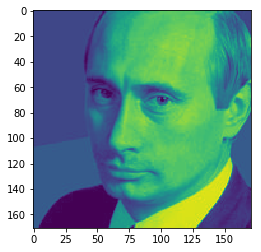

In [173]:
plt.imshow(prp.crop_faces(puten)[1])

In [192]:
gref = face_embedding(gref1)
ya = face_embedding(ya)
puten = face_embedding(puten)
gref2 = face_embedding(gref2)
gref3 = face_embedding(gref3)
putin2 = face_embedding(putin2)
ya2 = face_embedding(ya2)
medv = face_embedding(medv)

ebn = face_embedding(ebn)
ebn2 = face_embedding(ebn2)
names = ['German','Roman']

In [193]:
prp.distance(ebn,ebn2)

9.726688

In [85]:
prp.distance(putin2,puten[1])

120.131744

In [86]:
from sklearn.svm import SVC

In [123]:
svm = SVC(probability=True,class_weight='balanced',random_state=42)

In [194]:
X = [gref.flatten(),ya.flatten(),putin2.flatten(),ebn.flatten()]
y = [0,1,2,3]

In [195]:
svm.fit(X,y)

/home/potemin/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [203]:
pred = svm.predict(pd.DataFrame(ebn2))
pred_prob = svm.predict_proba(pd.DataFrame(ebn2))

In [204]:
pred_prob[0]

array([0.25441953, 0.29385573, 0.24751149, 0.20421325])

In [205]:
print('class: ',pred,', proba: ',pred_prob[0][pred[0]])

class:  [3] , proba:  0.20421324613517639
